# ML Facial recognition to detect mood and suggest songs accordingly
## Author : Laukit Mandal

**Dataset:https://www.kaggle.com/datasets/msambare/fer2013**

In [147]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model
from keras.layers import Flatten, Dense, LSTM, Dropout, Embedding, Activation
import os
import pathlib
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator, load_img
main_accent_colour = "#b366ff"
dim_colour="darkgrey"
main_palette = ["#FBE5C0", "#DD9A30", "#F88379", "#FF6FC2", "purple", "#D086F6", "#B0D2C2", "#4C5D70", "#6FA2CE", "#382D24", "#3ACF3A", "#7D7D00"]
vals = ["disgust"]

In [148]:
print("TensorFlow version :", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow version : 2.8.0
Num GPUs Available:  0


**Data Visualization**

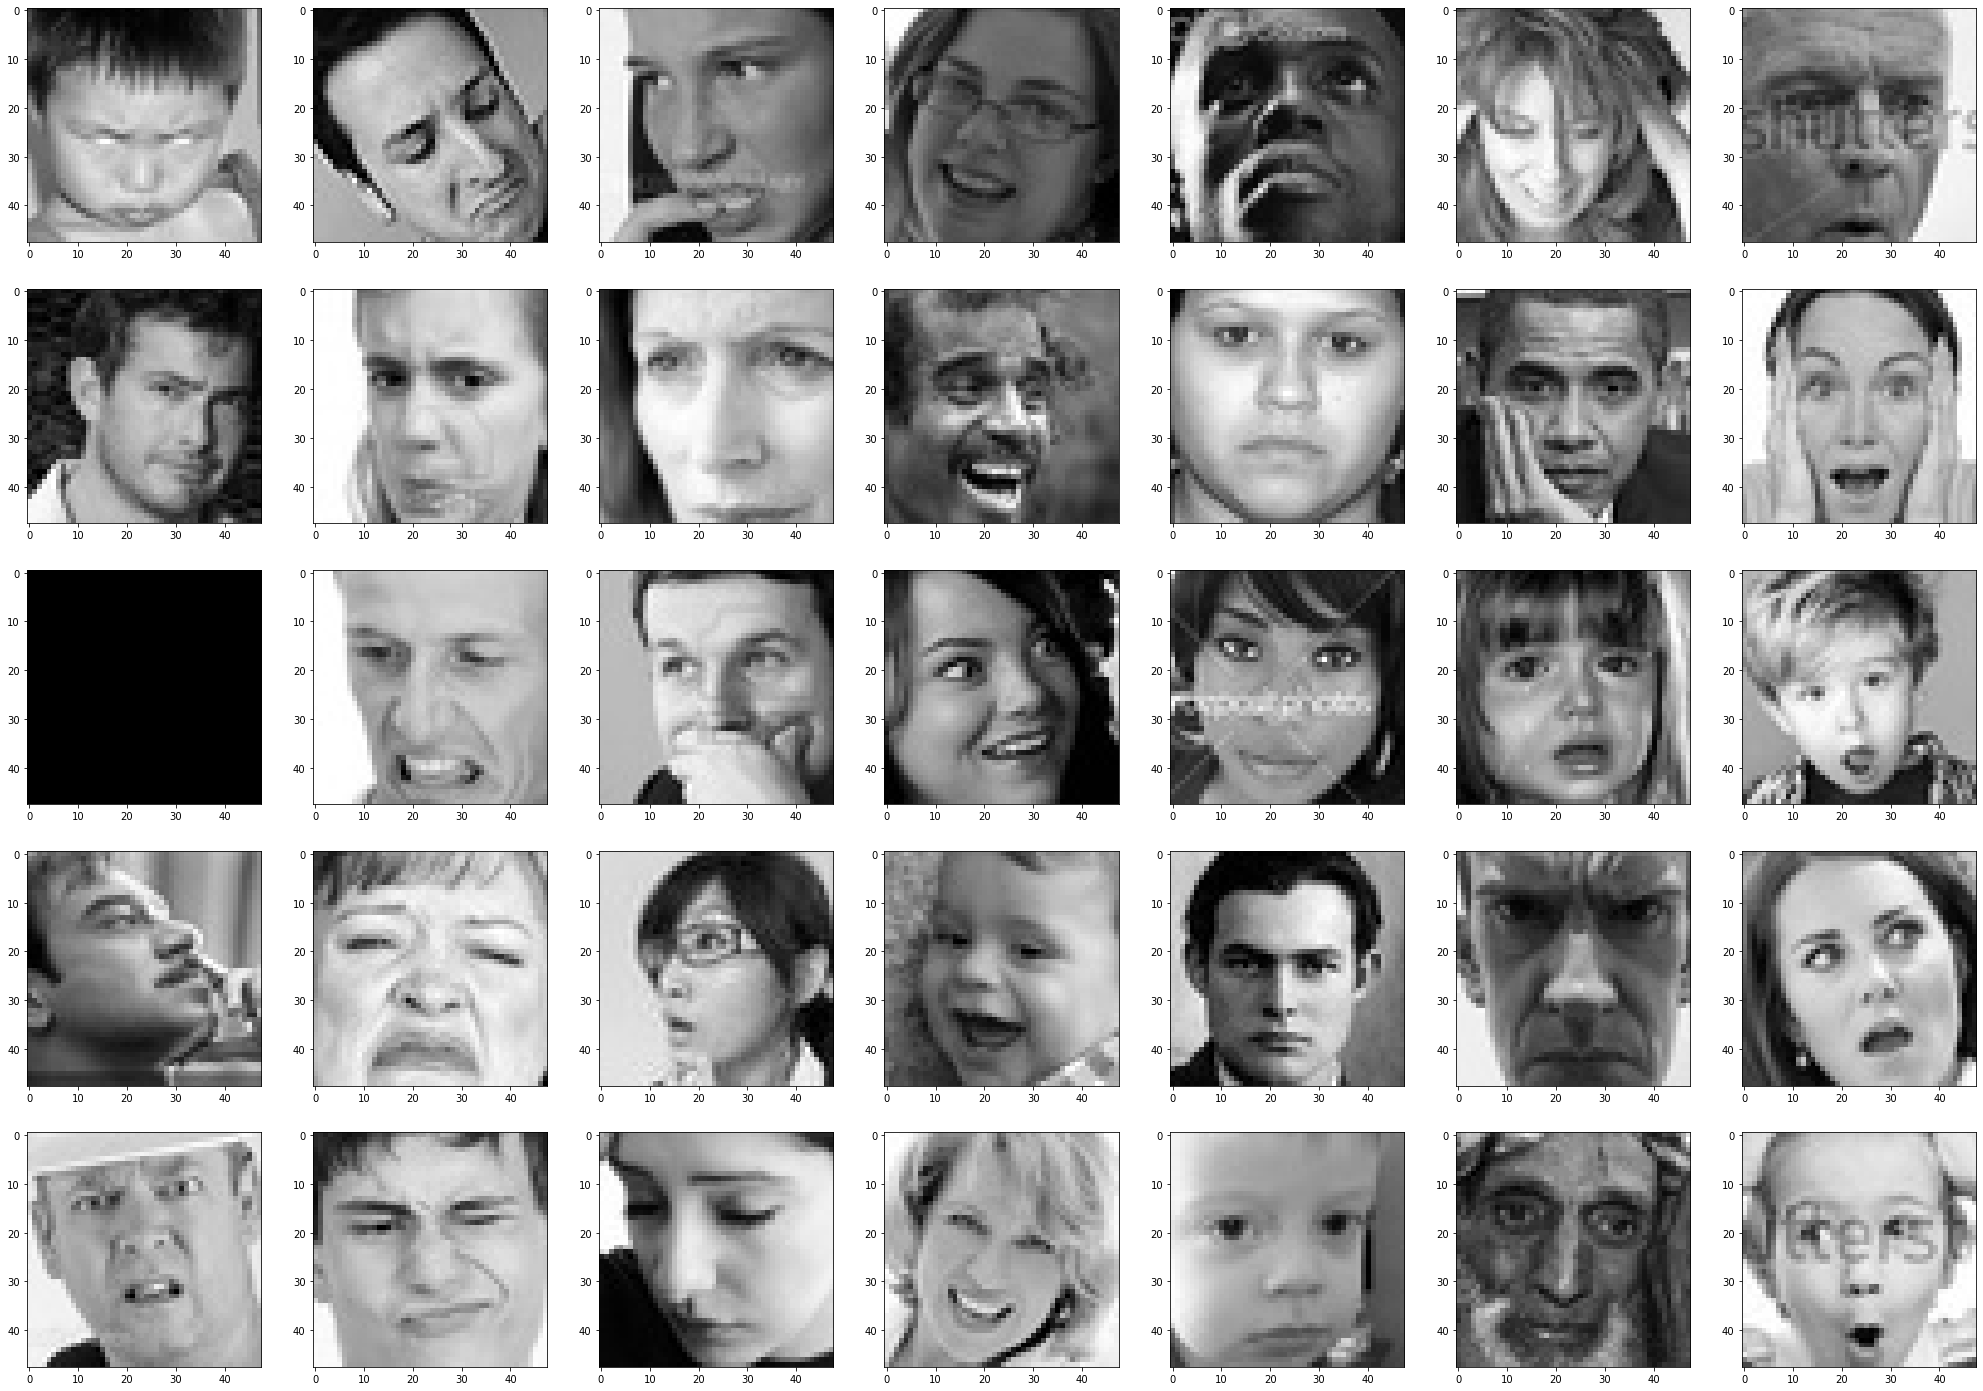

In [149]:
# Data Visualization
from skimage.io import imread
train_dir = 'C:/Users/Laukit/Downloads/FER-2013/train/'
test_dir = 'C:/Users/Laukit/Downloads/FER-2013/test/'
total_labels = len(os.listdir(train_dir))
fig, ax = plt.subplots(nrows=5, ncols=total_labels, figsize=(35, 25))
for x in range(5):
    for y,v in zip(range(total_labels),os.listdir(train_dir)):
        ax[x][y].imshow(imread(train_dir+v+'/'+os.listdir(train_dir+v)[x]), cmap='gray')

plt.show()

In [150]:
print("Train Set :")
train_count = []
for folder in os.listdir(train_dir) :
    print(folder, "folder contains\t\t", len(os.listdir(train_dir+folder)), "image")
    train_count.append(len(os.listdir(train_dir+folder)))    
print()
test_count = []
print("Test Set :")
for folder in os.listdir(test_dir) :
    print(folder, "folder contains\t\t", len(os.listdir(test_dir+folder)), "images")
    test_count.append(len(os.listdir(test_dir+folder)))

Train Set :
angry folder contains		 3995 image
disgust folder contains		 436 image
fear folder contains		 4097 image
happy folder contains		 7215 image
neutral folder contains		 4965 image
sad folder contains		 4830 image
surprise folder contains		 3171 image

Test Set :
angry folder contains		 958 images
disgust folder contains		 111 images
fear folder contains		 1024 images
happy folder contains		 1774 images
neutral folder contains		 1233 images
sad folder contains		 1247 images
surprise folder contains		 831 images


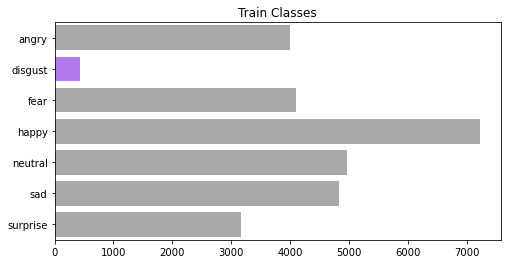

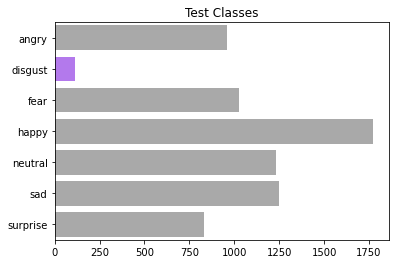

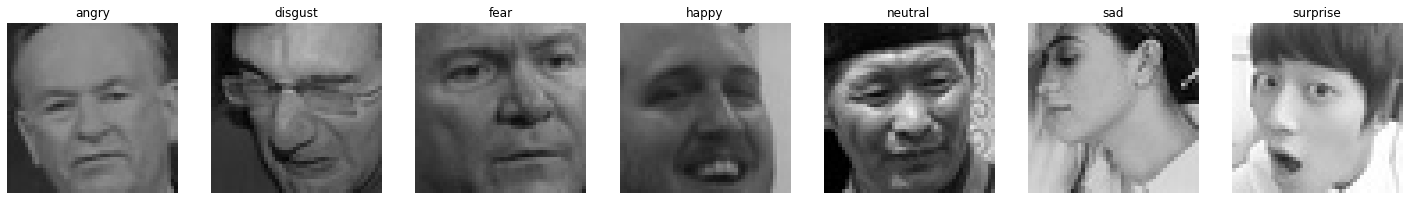

In [151]:
palette = {c: dim_colour if c not in vals else main_accent_colour for c in os.listdir(train_dir)}
plt.figure(figsize=(8,4))
ax = sns.barplot(y=os.listdir(train_dir),x=train_count,palette=palette).set(title='Train Classes')
plt.show()
print()
ax = sns.barplot(y=os.listdir(test_dir),x=test_count,palette=palette).set(title='Test Classes')
plt.show()
print()
plt.figure(figsize=(25,25))
i = 1
for folder in os.listdir(train_dir):   
    img = load_img((train_dir + folder +'/'+ os.listdir(train_dir + folder)[6]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(folder)
    plt.axis('off')
    i += 1    
plt.show()

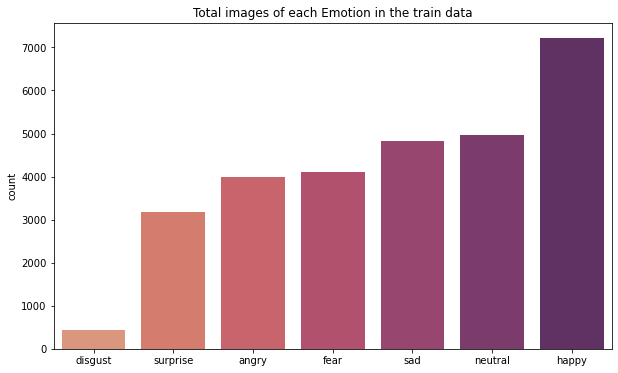

In [152]:
df = {}
for i in os.listdir(train_dir):
    directory = train_dir + i
    df[i] = len(os.listdir(directory))
df = pd.DataFrame(df, index=["total"]).transpose().sort_values("total")
plt.figure(figsize=(10,6))
sns.barplot(x=df.index, y="total", palette="flare", data=df)
plt.ylabel("count")
plt.title("Total images of each Emotion in the train data")
plt.show()

**Image Preprocessing**

In [153]:
IMAGE_SIZE=48
BATCH_SIZE=64
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

train_datagen = train_datagen.flow_from_directory(train_dir,
                                                batch_size=BATCH_SIZE,
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = test_datagen.flow_from_directory(test_dir,
                                                batch_size=BATCH_SIZE,
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [154]:
os.listdir(train_dir)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [155]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

**Model**

In [156]:
from tensorflow.keras import layers, models
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(48,48,1)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D((2, 2)), 
    layers.BatchNormalization(),
    layers.Dropout(0.40),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

end=cnn.fit(train_datagen,epochs=10,validation_data=test_datagen)

Epoch 1/10
449/449 [==============================] - 142s 315ms/step - loss: 1.8566 - accuracy: 0.3012 - val_loss: 1.8889 - val_accuracy: 0.2782
Epoch 2/10
449/449 [==============================] - 70s 156ms/step - loss: 1.5953 - accuracy: 0.3788 - val_loss: 1.4726 - val_accuracy: 0.4274
Epoch 3/10
449/449 [==============================] - 71s 158ms/step - loss: 1.5166 - accuracy: 0.4078 - val_loss: 1.4298 - val_accuracy: 0.4395
Epoch 4/10
449/449 [==============================] - 70s 156ms/step - loss: 1.4669 - accuracy: 0.4271 - val_loss: 1.3947 - val_accuracy: 0.4632
Epoch 5/10
449/449 [==============================] - 70s 156ms/step - loss: 1.4354 - accuracy: 0.4424 - val_loss: 1.4036 - val_accuracy: 0.4642
Epoch 6/10
449/449 [==============================] - 70s 157ms/step - loss: 1.4045 - accuracy: 0.4585 - val_loss: 1.3983 - val_accuracy: 0.4656
Epoch 7/10
449/449 [==============================] - 78s 173ms/step - loss: 1.3845 - accuracy: 0.4660 - val_loss: 1.3685 - val_a

**Saving File**

In [157]:
cnn.save("ML_Facial_recognition_model.h5")

**Evaluation of Model**

In [158]:
# Evaluate the model
test_loss, test_acc = cnn.evaluate(test_datagen)
print("validation accuracy :", str(test_acc*100)+"%")
print("validation loss :", test_loss)

113/113 [==============================] - 4s 37ms/step - loss: 1.2967 - accuracy: 0.4930
validation accuracy : 49.30342733860016%
validation loss : 1.296743631362915


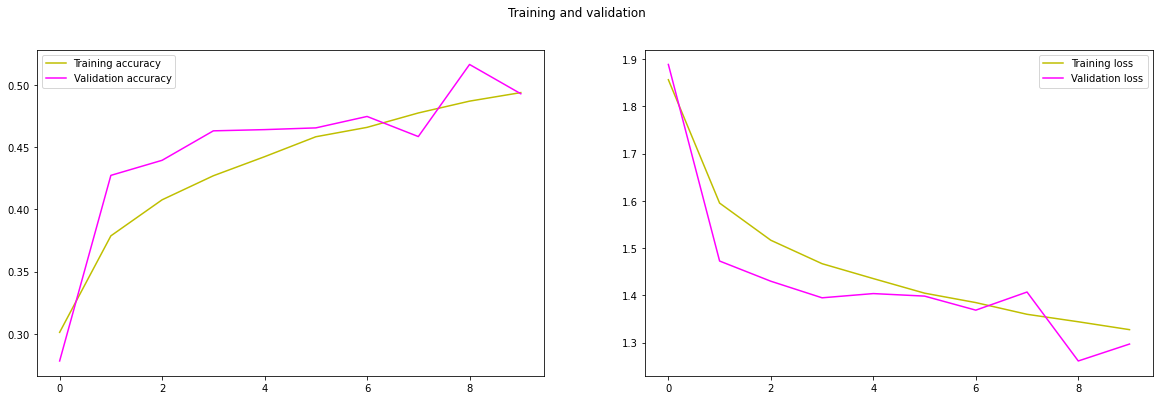

In [159]:
acc = end.history['accuracy']
val_acc = end.history['val_accuracy']
loss = end.history['loss']
val_loss = end.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'magenta', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'magenta', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

              precision    recall  f1-score   support

       angry       0.14      0.12      0.13       958
     disgust       0.04      0.01      0.01       111
        fear       0.14      0.15      0.14      1024
       happy       0.25      0.31      0.28      1774
     neutral       0.17      0.18      0.18      1233
         sad       0.16      0.13      0.14      1247
    surprise       0.11      0.09      0.10       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.17      7178





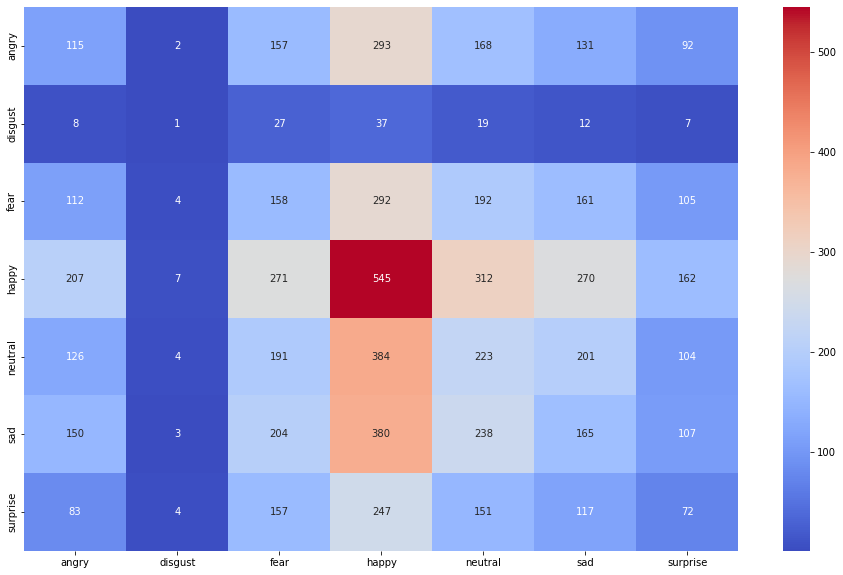

In [160]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(cnn.predict(test_datagen), axis=-1)
print(classification_report(test_datagen.classes, y_pred, target_names=test_datagen.class_indices.keys()), end='\n\n\n')

cm = confusion_matrix(test_datagen.classes, y_pred)
plt.figure(figsize=(16,10))
sns.heatmap(cm, cmap=plt.cm.coolwarm, annot=True, fmt='.0f', xticklabels=test_datagen.class_indices.keys(), yticklabels=test_datagen.class_indices.keys())
plt.show()

**Recommending Music**

In [232]:
mood_music = pd.read_csv("Songs_For_diffrent_moods.csv")
mood_music = mood_music[['name','artist','mood']]
mood_music.head()

,name,artist,mood
0,1999,Prince,Happy
1,23,Blonde Redhead,Sad
2,9 Crimes,Damien Rice,Sad
3,99 Luftballons,Nena,Happy
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic


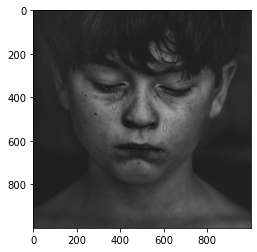

In [261]:
image = cv2.imread('sadd.jfif',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.show()

In [262]:
image = cv2.resize(image,(48,48))
img=np.array(image)
img=img.reshape(1,48,48,1)
predict_x=cnn.predict(img) 
result=np.argmax(predict_x,axis=1)
result[0]

5

In [263]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [264]:
if(result[0]==0 or result[0]==1 or result[0]==2 ):
    #for angery,disgust,fear
    filter1=mood_music['mood']=='Calm'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(result[0]==3 or result[0]==4):
    #for happy, neutral
    filter1=mood_music['mood']=='Happy'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(result[0]==5):
       #for Sad
    filter1=mood_music['mood']=='Sad'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(result[0]==6):
     #for surprise
    filter1=mood_music['mood']=='Energetic'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)

,index,name,artist,mood
0,666,Your Turn Now,Aaron Smith,Sad
1,161,Eden - Hunted Version,Anna Calvi,Sad
2,272,Into Black,Blouse,Sad
3,578,To The Hilt,BANKS,Sad
4,44,Bad Feeling,Muzz,Sad
